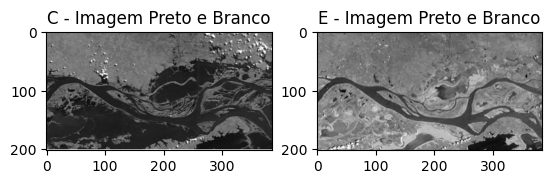

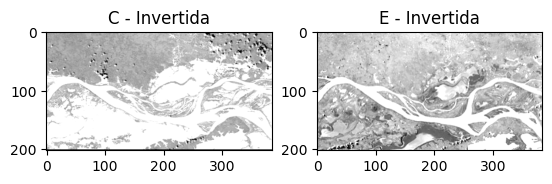

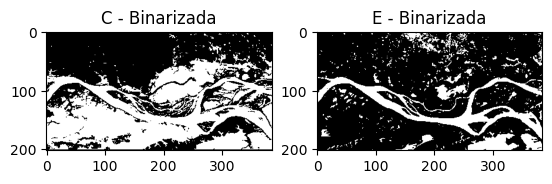

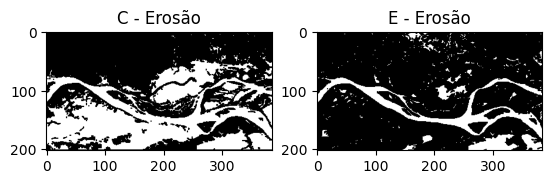

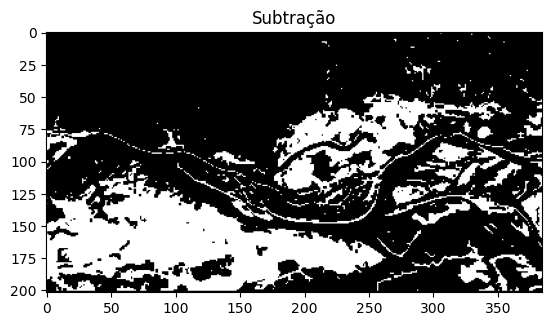

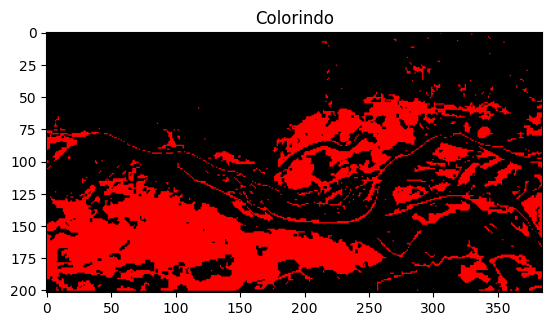

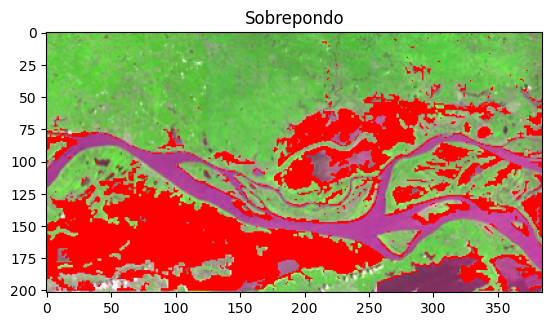

In [14]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

img_chuvoso = cv2.imread('chuvoso.png')
img_estiagem = cv2.imread('estiagem.png')

altura1, largura1 = img_chuvoso.shape[:2]

img_estiagem = cv2.resize(img_estiagem, (largura1, altura1))



# Chuvoso
img_chuvoso = cv2.cvtColor(img_chuvoso, cv2.COLOR_RGB2GRAY)
plt.subplot(1,2,1)
plt.imshow(img_chuvoso, 'gray')
plt.title('C - Imagem Preto e Branco')
img_estiagem_original = img_estiagem

#Estiagem
img_estiagem = cv2.cvtColor(img_estiagem, cv2.COLOR_RGB2GRAY)
plt.subplot(1,2,2)
plt.imshow(img_estiagem, 'gray')
plt.title('E - Imagem Preto e Branco')

plt.show()

##Inversão de cor

#Chuvoso
img_chuvoso = cv2.bitwise_not(img_chuvoso)
img_chuvoso = cv2.convertScaleAbs(img_chuvoso,3,1.3)

plt.subplot(1,2,1)
plt.imshow(img_chuvoso, 'gray')
plt.title('C - Invertida')

#Estiagem
img_estiagem = cv2.bitwise_not(img_estiagem)
img_estiagem = cv2.convertScaleAbs(img_estiagem,3,2)

plt.subplot(1,2,2)
plt.imshow(img_estiagem, 'gray')
plt.title('E - Invertida')

plt.show()

##Binarização

#Chuvoso
(T, bin) = cv2.threshold(img_chuvoso, 232, 255, cv2.THRESH_BINARY)
img_chuvoso = bin
plt.subplot(1,2,1)
plt.imshow(img_chuvoso, 'gray')
plt.title('C - Binarizada')


#Estiagem
(T, bin) = cv2.threshold(img_estiagem, 230, 255, cv2.THRESH_BINARY)
img_estiagem = bin
plt.subplot(1,2,2)
plt.imshow(img_estiagem, 'gray')
plt.title('E - Binarizada')

plt.show()

##Erosão

#Chuvoso
kernel = np.ones((2,2),np.uint8)
img_chuvoso = cv2.erode(img_chuvoso,kernel,iterations = 1)
plt.subplot(1,2,1)
plt.imshow(img_chuvoso,'gray')
plt.title('C - Erosão')

#Estiagem
img_estiagem = cv2.erode(img_estiagem,kernel,iterations = 1)
plt.subplot(1,2,2)
plt.imshow(img_estiagem,'gray')
plt.title('E - Erosão')

plt.show()

##Dilatação

#Chuvoso
""" img_chuvoso = cv2.dilate(img_chuvoso,kernel,iterations = 1)
plt.subplot(1,2,1)
plt.imshow(img_chuvoso,'gray')
plt.title('C - Dilatação')

#Estiagem
img_estiagem = cv2.dilate(img_estiagem,kernel,iterations = 1)
plt.subplot(1,2,2)
plt.imshow(img_estiagem,'gray')
plt.title('E - Dilatação')
 """

plt.show()

## Subtraindo imagens
subtractedImage = cv2.subtract(img_chuvoso,img_estiagem)
plt.imshow(subtractedImage,'gray')
plt.title('Subtração')
plt.show()

## Colorindo

altura, largura = subtractedImage.shape

imagem_colorida = np.zeros((altura, largura, 3), dtype=np.uint8)

for i in range(altura):
    for j in range(largura):
        if subtractedImage[i, j] == 255:
             imagem_colorida[i,j] = [255, 0, 0]


plt.imshow(imagem_colorida)
plt.title('Colorindo')
plt.show()

altura, largura = subtractedImage.shape


## Sobrepondo
for i in range(altura):
    for j in range(largura):
        if  np.array_equal(imagem_colorida[i, j], [255, 0, 0]):
             img_estiagem_original[i,j] = [255, 0, 0]


plt.imshow(img_estiagem_original)
plt.title('Sobrepondo')
plt.show()

